In [47]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
%matplotlib inline
plt.rcParams['figure.figsize']=[15.0,12.0]
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=6
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.size']=4
plt.rcParams['xtick.minor.width']=2
plt.rcParams['ytick.major.size']=6
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.size']=4
plt.rcParams['ytick.minor.width']=2
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize'] =24
plt.rcParams['legend.fontsize']= 24
plt.rcParams['legend.framealpha'] = 0.95
plt.rcParams['legend.handlelength']=2.0
plt.rcParams['figure.facecolor']="w"
plt.rcParams['xtick.direction']= 'in'
plt.rcParams['ytick.direction']= 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [48]:
import sys, os
sys.path.append("/home/pat/terliuk/software/DARWIN/DecayFitter/")
from AnalyticCalculator import AnalyticCalculator
from BinnedFitter import BinnedFitter

In [49]:
bin_edges = np.linspace(2200, 2800, 31)
ltime = 10.
loader = AnalyticCalculator(bin_edges, 
                         livetime=ltime, 
                         )
fitter = BinnedFitter(loader =loader )


In [50]:
inject_values = {"AXe136": 0.0, 
                 "Scale208Tl" : 2.511,
                 "Norm214Bi" : 1.0,
                 "NormCont" : 1.0,
                 "ContSlope" : -1.2,
                 "Scale137Xe" : 1.42e-3, 
                 "T12_136Xe_2vbb" : 2.165
                }
histogram = fitter.getExpectation(**inject_values)
fitpriors_default = {"Scale208Tl" : [2.511, 0.082],  
                     "Norm214Bi"  : [1.0, 0.036],
                     "NormCont"   : [1.0, 0.036],
                     "ContSlope"  : [-1.2, 10.0],
                     "Scale137Xe" : [1.42e-3, 0.17e-3 ],
                     "T12_136Xe_2vbb" : [2.165, 0.063]
                        }
def_fvals = {"AXe136": [0.1, False], 
            "Scale208Tl" : [ 3.0, False],
            "Norm214Bi" : [1.1, False], 
            "NormCont" : [1.2, False],
            "ContSlope" : [-1.2, False],
            "Scale137Xe" : [1.5e-3, False],
            "T12_136Xe_2vbb" : [2.1, False]
           }

In [51]:
def get_settings_priors(case = "real"):
    cur_fvals = deepcopy(def_fvals)
    cur_priors = deepcopy(fitpriors_default)
    if case =="ideal":
        for key in cur_priors.keys():
            cur_priors[key] = [inject_values[key], 1e-8*inject_values[key] ]
    elif case =="real":
        pass
    elif "fix:" in case:
        variables = case.split("fix:")[-1]
        variables = variables.split(",")
        print("Fixing : ",  variables)
        for var in variables:
            cur_fvals[var] = [inject_values[var], True ]     
    elif "reducesigma:" in case: 
        reduceinfo = case.split("reducesigma:")[-1]
        reduceinfovars = reduceinfo.split(",")
        #print(reduceinfovars)
        for rline in reduceinfovars:
            tmpinf = rline.split("=")
            var = tmpinf[0]
            factor = float(tmpinf[1])
            print("%s reducing sigma by factor %0.2f"%(var, factor))
            cur_priors[var][1]=cur_priors[var][1]/factor
    else : 
        print("Error! Unknown confuration!")
        return None
    return cur_fvals, cur_priors

In [52]:
#LLHs_null

In [53]:
signal_strength  = np.linspace(0,1.0,101)

LLHs_global = {}
LLHs_null ={}

for case in ["real", "ideal"] : 
    print(case)
    
    LLHs_global[case] = np.nan*np.ones_like(signal_strength)
    LLHs_null[case] = np.nan*np.ones_like(signal_strength)
    cur_fsettings, cur_fpriors = get_settings_priors(case)
    cur_fsettings_null = deepcopy(cur_fsettings)
    cur_fsettings_null['AXe136'] = [0.0, True]
    for i in range(len(signal_strength)):
        print(signal_strength[i])
        cur_injvals = deepcopy(inject_values)
        cur_injvals['AXe136'] = signal_strength[i]
        cur_expectation = loader.getBinnedExpectation(**cur_injvals)
        cur_gl_fit = fitter.FitValue(histogram = cur_expectation, 
               fitvalues = cur_fsettings, 
               priors = cur_fpriors,
               ftol = 1e-3,
               verbosity = 0
               )
        LLHs_global[case][i] = cur_gl_fit['LLH']
        cur_null_fit = fitter.FitValue(histogram = cur_expectation, 
               fitvalues = cur_fsettings_null, 
               priors = cur_fpriors,
               ftol = 1e-3,
               verbosity = 0
               )
        LLHs_null[case][i] = cur_null_fit['LLH']


real
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
ideal
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.5

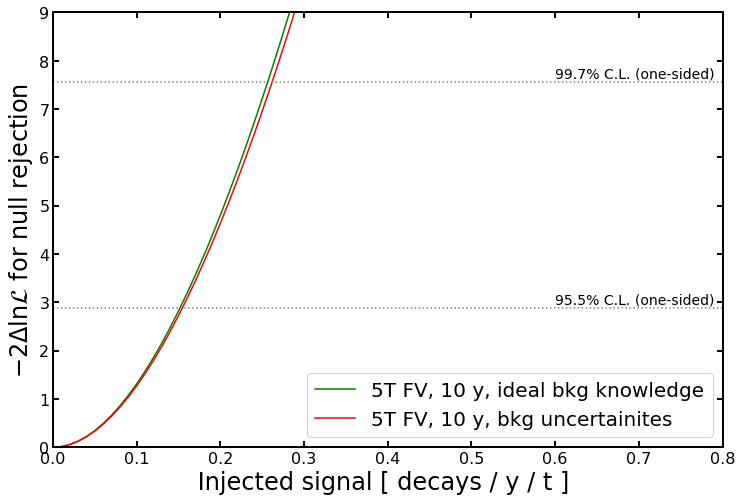

In [54]:
# And plotting the scan 
fig = plt.figure(figsize = (12,8))
ax= fig.add_subplot(111)

ax.plot(signal_strength, 2.0*(LLHs_null['ideal'] - LLHs_global['ideal']), c ="g", label = "5T FV, 10 y, ideal bkg knowledge" )
ax.plot(signal_strength, 2.0*(LLHs_null['real'] - LLHs_global['real']), c ="r" , label = "5T FV, 10 y, bkg uncertainites" )


#plt.axhline(1.0, c= "0.5", ls =":")
plt.axhline(7.55, c= "0.5", ls =":")
plt.axhline(2.874, c= "0.5", ls =":")
plt.text(0.60,7.65, "99.7% C.L. (one-sided)", fontsize=14)
plt.text(0.60,2.974, "95.5% C.L. (one-sided)", fontsize=14)

ax.set_ylim(0, 9)
ax.set_xlim(0, 0.8)
ax.set_ylabel(r"$ - 2 \Delta \ln \mathcal{L} $ for null rejection")
ax.set_xlabel(r" Injected signal [ decays / y / t ]  ")
ax.legend(fontsize=20)

#fig.savefig("/home/pat/terliuk/science/DARWIN/0vbb_sens/DARWIN_5t_10y_discovery_amplitude_2200_2800.png", dpi=300)
#fig.savefig("/home/pat/terliuk/science/DARWIN/0vbb_sens/DARWIN_5t_10y_discovery_amplitude_2200_2800.pdf", dpi=300)

/misc/home/pat/terliuk/test_venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


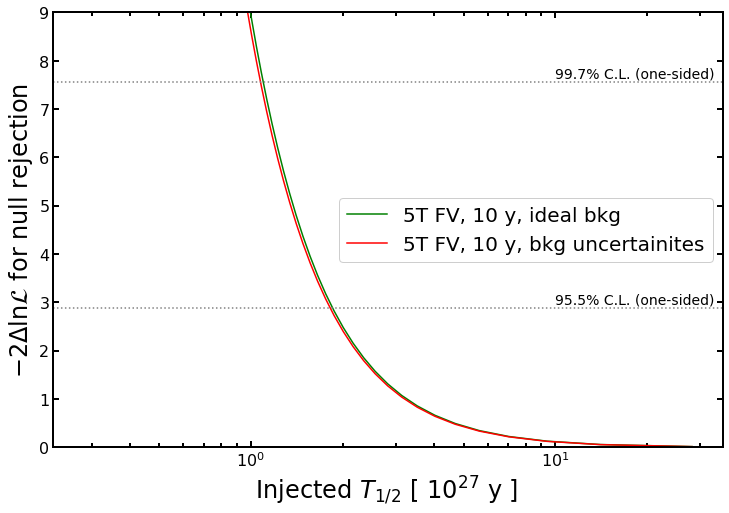

In [55]:
# And plotting the scan 
fig = plt.figure(figsize = (12,8))
ax= fig.add_subplot(111)


T_1_2 = 0.28157 / signal_strength

ax.plot(T_1_2, 2.0*(LLHs_null['ideal'] - LLHs_global['ideal']), c ="g", label = "5T FV, 10 y, ideal bkg" )
ax.plot(T_1_2, 2.0*(LLHs_null['real'] - LLHs_global['real']), c ="r" , label = "5T FV, 10 y, bkg uncertainites" )


#plt.axhline(1.0, c= "0.5", ls =":")
plt.axhline(7.55, c= "0.5", ls =":")
plt.axhline(2.874, c= "0.5", ls =":")
plt.text(10,7.65, "99.7% C.L. (one-sided)", fontsize=14)
plt.text(10,2.974, "95.5% C.L. (one-sided)", fontsize=14)

ax.set_ylim(0, 9)
ax.set_xscale("log")
#ax.set_xlim(0, 0.8)
ax.set_ylabel(r"$ - 2 \Delta \ln \mathcal{L} $ for null rejection")
ax.set_xlabel(r" Injected $T_{1/2}$ [ $10^{27}$ y ]  ")
ax.legend(fontsize=20)

#fig.savefig("/home/pat/terliuk/science/DARWIN/0vbb_sens/DARWIN_5t_10y_discovery_halflife_2200_2800.png", dpi=300)
#fig.savefig("/home/pat/terliuk/science/DARWIN/0vbb_sens/DARWIN_5t_10y_discovery_halflife_2200_2800.pdf", dpi=300)

In [56]:
from scipy.interpolate import interp1d
from scipy.optimize import root
discovery = {}
discovery_results = {}
for case in ['ideal', 'real']:
    # Creating spline 
    critical_value = 7.55 # This is critical value for xi^2 with 1 dof for 90% C.L. 
    doubleLLH_profile = interp1d(T_1_2[1:], 2.0 * (LLHs_null[case] - LLHs_global[case])[1:], kind="cubic") 
    halflife_result =  root(lambda x: doubleLLH_profile(x) - critical_value, 0.65 ) 
    #print(halflife_result)
    discovery_results[case]=halflife_result
    discovery[case]=halflife_result['x']

In [46]:
discovery

{'ideal': array([1.0896885]), 'real': array([1.06704794])}